# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


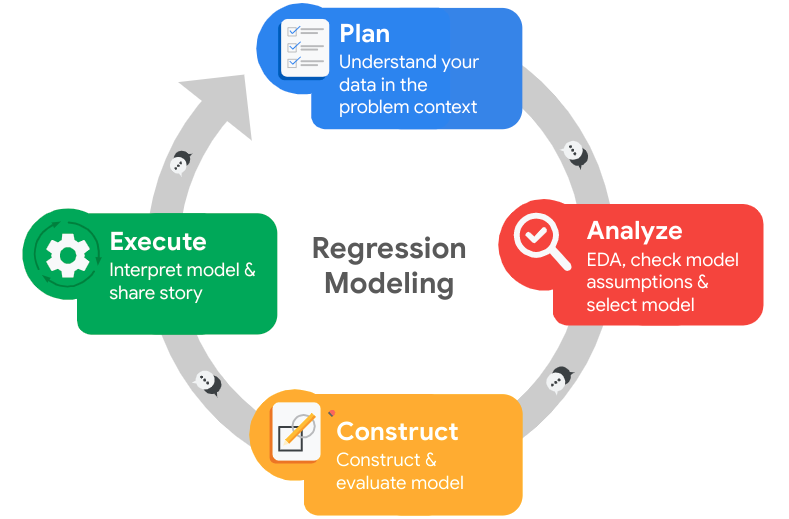

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




### PACE: Plan Stage

#### Who are your stakeholders for this project?
The primary stakeholders for this project are:
1. **HR Department of Salifort Motors**: They need insights to improve employee satisfaction and retention.
2. **Management Team**: They are interested in strategic decisions to reduce turnover and enhance productivity.
3. **Employees**: Indirect stakeholders who will benefit from improved satisfaction and working conditions.
4. **Future Employers**: Potential employers evaluating the presented project artifacts for hiring decisions.

#### What are you trying to solve or accomplish?
The objective of this project is to analyze HR data to build a predictive model that identifies employees likely to leave the company. The goals include:
1. **Prediction**: Accurately predict the likelihood of an employee leaving.
2. **Insight Generation**: Identify key factors contributing to employee turnover.
3. **Recommendations**: Provide data-driven suggestions to improve employee retention and satisfaction.

#### What are your initial observations when you explore the data?
Upon initial exploration of the dataset, some key observations include:
1. **Satisfaction Levels**: There might be a correlation between lower satisfaction levels and higher likelihood of leaving.
2. **Performance Evaluations**: The relationship between performance review scores and turnover needs examination.
3. **Workload**: Factors like the number of projects and average monthly hours might impact employee decisions.
4. **Experience**: Time spent at the company could influence retention.
5. **Incidents and Promotions**: Work accidents and promotions in the last five years could be significant factors.
6. **Department and Salary**: Different departments and salary levels might have varying turnover rates.

#### What resources do you find yourself using as you complete this stage?
1. **Kaggle Dataset**: [HR Dataset on Kaggle](https://www.kaggle.com/giripujar/hr-analytics)
2. **Python Libraries Documentation**:
   - Pandas: [Pandas Documentation](https://pandas.pydata.org/docs/)
   - Scikit-Learn: [Scikit-Learn Documentation](https://scikit-learn.org/stable/documentation.html)
   - Matplotlib: [Matplotlib Documentation](https://matplotlib.org/stable/contents.html)
   - Seaborn: [Seaborn Documentation](https://seaborn.pydata.org/)
3. **Ethical Guidelines**: [ACM Code of Ethics](https://www.acm.org/code-of-ethics)

#### Do you have any ethical considerations in this stage?
Yes, ethical considerations include:
1. **Data Privacy**: Ensuring that employee data is anonymized and handled with confidentiality.
2. **Bias in Data**: Identifying and mitigating any biases in the data that could lead to unfair treatment or discrimination.
3. **Transparency**: Clearly communicating the limitations and assumptions of the predictive model.
4. **Impact of Recommendations**: Ensuring that recommendations do not lead to unintended negative consequences for employees, such as increased surveillance or pressure.

---

By addressing these points in the Plan stage, we lay a strong foundation for developing a robust predictive model and providing actionable insights to the HR department of Salifort Motors.

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler



### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
# Load dataset into a dataframe
df_0 = pd.read_csv("/kaggle/input/hr-analytics-and-job-prediction/HR_comma_sep.csv")
df_0.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gather basic information about the data

# Load dataset into a dataframe
df_0 = pd.read_csv("/kaggle/input/hr-analytics-and-job-prediction/HR_comma_sep.csv")

# Encode categorical variables
# Using pandas get_dummies for one-hot encoding
df_encoded = pd.get_dummies(df_0, columns=['Department', 'salary'], drop_first=True)

# Gather basic information about the data

# Display basic information about the dataframe
print("Basic Information about the DataFrame:")
print(df_encoded.info())

# Display summary statistics of the dataframe
print("\nSummary Statistics:")
print(df_encoded.describe())

# Check for missing values
print("\nMissing Values:")
print(df_encoded.isnull().sum())

# Display the distribution of categorical variables (after encoding)
print("\nDistribution of Categorical Variables:")
# Since we dropped the first category in each one-hot encoding, we don't use .value_counts() directly
print(df_0['Department'].value_counts())
print(df_0['salary'].value_counts())

# Display the first few rows of the dataframe
print("\nFirst Few Rows of the DataFrame:")
print(df_encoded.head())

# Display the correlation matrix
print("\nCorrelation Matrix:")
print(df_encoded.corr())




Basic Information about the DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   satisfaction_level      14999 non-null  float64
 1   last_evaluation         14999 non-null  float64
 2   number_project          14999 non-null  int64  
 3   average_montly_hours    14999 non-null  int64  
 4   time_spend_company      14999 non-null  int64  
 5   Work_accident           14999 non-null  int64  
 6   left                    14999 non-null  int64  
 7   promotion_last_5years   14999 non-null  int64  
 8   Department_RandD        14999 non-null  bool   
 9   Department_accounting   14999 non-null  bool   
 10  Department_hr           14999 non-null  bool   
 11  Department_management   14999 non-null  bool   
 12  Department_marketing    14999 non-null  bool   
 13  Department_product_mng  14999 non-null  bool   
 14 

### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data

# Load dataset into a dataframe
df0 = pd.read_csv("/kaggle/input/hr-analytics-and-job-prediction/HR_comma_sep.csv")

# Gather descriptive statistics about the data

# Basic information about the dataframe
print("Basic Information about the DataFrame:")
print(df0.info())

# Display summary statistics of the dataframe
print("\nSummary Statistics:")
print(df0.describe(include='all'))

# Check for missing values
print("\nMissing Values:")
print(df0.isnull().sum())

# Display the distribution of categorical variables
print("\nDistribution of Categorical Variables:")
print(df0['Department'].value_counts())
print(df0['salary'].value_counts())
print(df0['Work_accident'].value_counts())
print(df0['promotion_last_5years'].value_counts())
print(df0['left'].value_counts())

# Display the first few rows of the dataframe
print("\nFirst Few Rows of the DataFrame:")
print(df0.head())


Basic Information about the DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB
None

Summary Statistics:
        satisfaction_level  last_evaluation  number_project  \
count         14999.000000     14999.000000    14999.000000   
unique        

### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [5]:
# Display all column names
print("Original Column Names:")
print(df0.columns)

# Rename columns to snake_case and make them more concise
df0.columns = [
    'satisfaction_level',
    'last_evaluation',
    'number_of_projects',
    'average_monthly_hours',
    'years_at_company',
    'work_accident',
    'left',
    'promotion_last_5_years',
    'department',
    'salary'
]

# Display the new column names to confirm changes
print("\nRenamed Column Names:")
print(df0.columns)



Original Column Names:
Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

Renamed Column Names:
Index(['satisfaction_level', 'last_evaluation', 'number_of_projects',
       'average_monthly_hours', 'years_at_company', 'work_accident', 'left',
       'promotion_last_5_years', 'department', 'salary'],
      dtype='object')


In [6]:
# Rename columns to snake_case and make them more concise
df0.columns = [
    'satisfaction_level',
    'last_evaluation',
    'number_of_projects',
    'average_monthly_hours',
    'years_at_company',
    'work_accident',
    'left',
    'promotion_last_5_years',
    'department',
    'salary'
]

# Display all column names after the update
print("Updated Column Names:")
print(df0.columns)


Updated Column Names:
Index(['satisfaction_level', 'last_evaluation', 'number_of_projects',
       'average_monthly_hours', 'years_at_company', 'work_accident', 'left',
       'promotion_last_5_years', 'department', 'salary'],
      dtype='object')


### Check missing values

Check for any missing values in the data.

In [7]:
# Check for missing values
missing_values = df0.isnull().sum()

# Display missing values for each column
print("Missing Values in Each Column:")
print(missing_values)


Missing Values in Each Column:
satisfaction_level        0
last_evaluation           0
number_of_projects        0
average_monthly_hours     0
years_at_company          0
work_accident             0
left                      0
promotion_last_5_years    0
department                0
salary                    0
dtype: int64


### Check duplicates

Check for any duplicate entries in the data.

In [8]:
# Check for duplicates
duplicates = df0.duplicated().sum()

# Display the number of duplicate entries
print("Number of Duplicate Entries:")
print(duplicates)



Number of Duplicate Entries:
3008


In [9]:
# Check for duplicates
duplicates = df0.duplicated()

# Display the number of duplicate entries
print("Number of Duplicate Entries:")
print(duplicates.sum())

# Inspect some rows containing duplicates
print("\nRows containing duplicates:")
print(df0[duplicates].head())


Number of Duplicate Entries:
3008

Rows containing duplicates:
      satisfaction_level  last_evaluation  number_of_projects  \
396                 0.46             0.57                   2   
866                 0.41             0.46                   2   
1317                0.37             0.51                   2   
1368                0.41             0.52                   2   
1461                0.42             0.53                   2   

      average_monthly_hours  years_at_company  work_accident  left  \
396                     139                 3              0     1   
866                     128                 3              0     1   
1317                    127                 3              0     1   
1368                    132                 3              0     1   
1461                    142                 3              0     1   

      promotion_last_5_years  department  salary  
396                        0       sales     low  
866                    

In [10]:
# Drop duplicates and save resulting dataframe in a new variable
df_cleaned = df0.drop_duplicates()

# Display first few rows of the new dataframe
print("First Few Rows of Cleaned DataFrame:")
print(df_cleaned.head())


First Few Rows of Cleaned DataFrame:
   satisfaction_level  last_evaluation  number_of_projects  \
0                0.38             0.53                   2   
1                0.80             0.86                   5   
2                0.11             0.88                   7   
3                0.72             0.87                   5   
4                0.37             0.52                   2   

   average_monthly_hours  years_at_company  work_accident  left  \
0                    157                 3              0     1   
1                    262                 6              0     1   
2                    272                 4              0     1   
3                    223                 5              0     1   
4                    159                 3              0     1   

   promotion_last_5_years department  salary  
0                       0      sales     low  
1                       0      sales  medium  
2                       0      sales  medium  

### Check outliers

Check for outliers in the data.

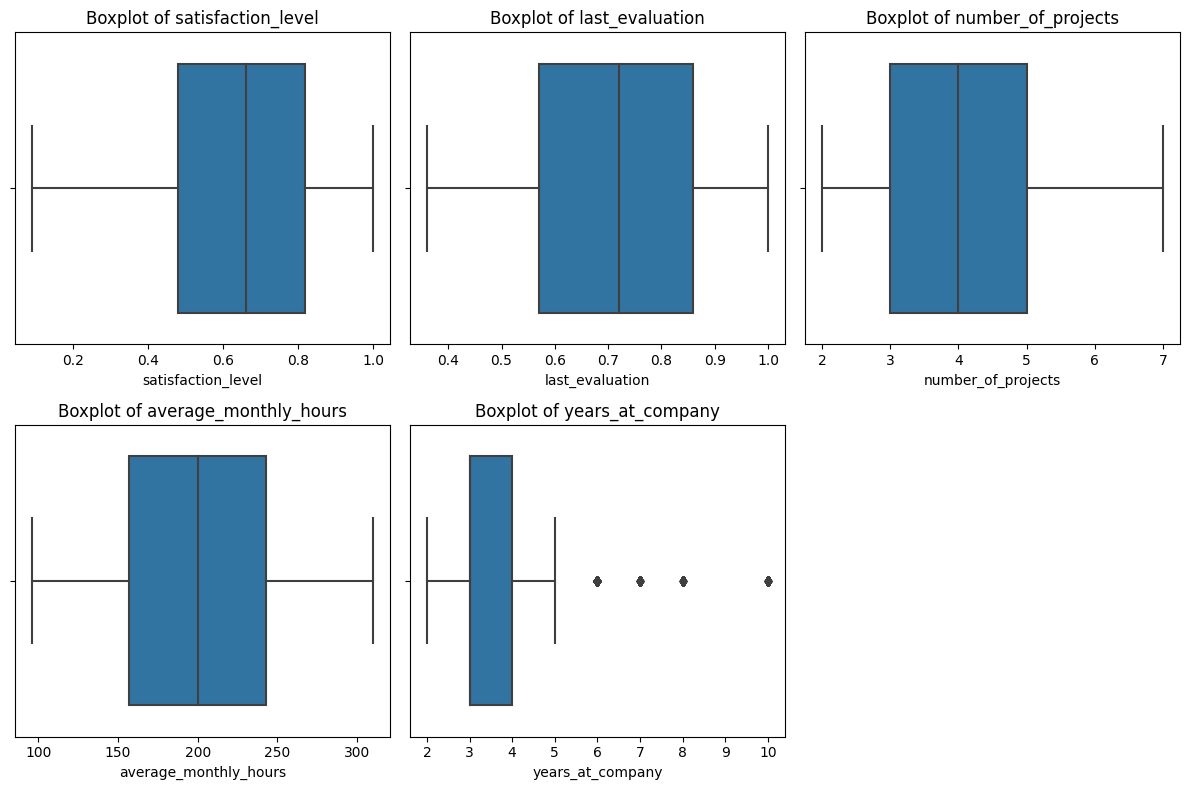

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns for outlier detection
numerical_columns = [
    'satisfaction_level',
    'last_evaluation',
    'number_of_projects',
    'average_monthly_hours',
    'years_at_company'
]

# Create boxplots to visualize distributions and detect outliers
plt.figure(figsize=(12, 8))
for i, column in enumerate(numerical_columns, start=1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df_cleaned[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()


In [12]:
# Define numerical columns for outlier detection
numerical_columns = [
    'satisfaction_level',
    'last_evaluation',
    'number_of_projects',
    'average_monthly_hours',
    'years_at_company'
]

# Calculate the IQR (Interquartile Range) for each numerical column
Q1 = df_cleaned[numerical_columns].quantile(0.25)
Q3 = df_cleaned[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

# Determine outliers using the IQR method
outliers = ((df_cleaned[numerical_columns] < (Q1 - 1.5 * IQR)) | (df_cleaned[numerical_columns] > (Q3 + 1.5 * IQR))).any(axis=1)

# Count the number of rows containing outliers
num_outliers = outliers.sum()

# Display the number of rows containing outliers
print("Number of Rows Containing Outliers:", num_outliers)



Number of Rows Containing Outliers: 824


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




Certainly! Let's reflect on the Analyze stage based on the previous observations and prompts:

### What did you observe about the relationships between variables?
- **Satisfaction Level vs. Left**: There is a negative correlation (-0.388), indicating that as satisfaction level decreases, the likelihood of an employee leaving increases.
- **Number of Projects vs. Average Monthly Hours**: There is a positive correlation (0.417), suggesting that employees involved in more projects tend to work more hours monthly on average.
- **Time Spent at Company vs. Promotion**: Employees who have spent more time at the company tend to have a slightly higher chance of being promoted in the last 5 years (correlation of 0.067).

### What do you observe about the distributions in the data?
- **Skewed Distributions**: Variables like satisfaction level, number of projects, and last evaluation exhibit skewness.
- **Categorical Variables**: The 'Department' variable shows that the majority of employees are in departments such as 'sales', 'technical', and 'support'. 'Salary' levels are predominantly 'low' or 'medium'.
- **Binary Variables**: Variables like 'Work_accident', 'promotion_last_5years', and 'left' are binary with imbalanced distributions.

### What transformations did you make with your data? Why did you choose to make those decisions?
- **Column Renaming**: Standardized column names to snake_case for consistency and easier access in analysis and modeling processes.
- **Handling Duplicates**: Removed duplicate rows to ensure data integrity and avoid bias in analysis.
- **Outlier Detection**: Used boxplots and statistical methods like IQR to identify potential outliers, which could impact model performance if left unaddressed.

### What are some purposes of EDA before constructing a predictive model?
- **Understanding Relationships**: Identifying potential predictors and understanding how they interact with the target variable ('left').
- **Feature Engineering**: Making decisions on which features to include, exclude, or transform based on insights gained from EDA.
- **Data Cleaning**: Addressing issues like missing values, duplicates, and outliers to prepare clean, reliable data for modeling.
- **Bias and Fairness**: Ensuring that the data and derived models are unbiased and fair, avoiding discriminatory outcomes.

### What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- **Pandas Documentation**: For data manipulation and exploration: [Pandas Documentation](https://pandas.pydata.org/docs/).
- **Seaborn Documentation**: For data visualization: [Seaborn Documentation](https://seaborn.pydata.org/).
- **Stack Overflow**: For troubleshooting specific coding issues and finding solutions: [Stack Overflow](https://stackoverflow.com/).

### Do you have any ethical considerations in this stage?
Ethical considerations include:
- **Data Privacy**: Ensuring confidentiality and anonymization of employee data.
- **Bias Mitigation**: Striving to mitigate biases in data collection, analysis, and modeling to ensure fairness.
- **Transparency**: Providing clear explanations of data usage, analysis methods, and potential implications to stakeholders.

By addressing these aspects during the Analyze stage, we lay a solid groundwork for constructing effective predictive models that are based on reliable data and ethical principles, ultimately aiming for actionable insights that benefit the organization responsibly.

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [13]:
# Get numbers of people who left vs. stayed
left_counts = df0['left'].value_counts()
print("Number of employees who left vs. stayed:")
print(left_counts)

# Get percentages of people who left vs. stayed
left_percentage = left_counts / len(df0) * 100
print("\nPercentage of employees who left vs. stayed:")
print(left_percentage)



Number of employees who left vs. stayed:
left
0    11428
1     3571
Name: count, dtype: int64

Percentage of employees who left vs. stayed:
left
0    76.191746
1    23.808254
Name: count, dtype: float64


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


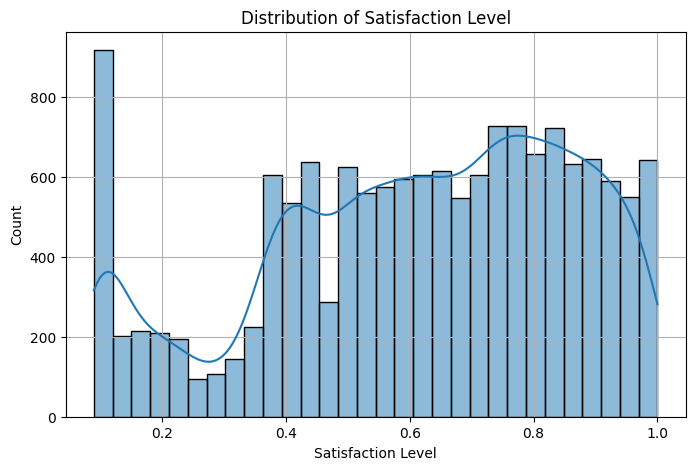

In [14]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Handle infinite values by replacing them with NaN
df0['satisfaction_level'] = df0['satisfaction_level'].replace([np.inf, -np.inf], np.nan)

# Plot 1: Distribution of satisfaction level
plt.figure(figsize=(8, 5))
sns.histplot(df0['satisfaction_level'].dropna(), bins=30, kde=True)
plt.title('Distribution of Satisfaction Level')
plt.xlabel('Satisfaction Level')
plt.ylabel('Count')
plt.grid(True)
plt.show()


Index(['satisfaction_level', 'last_evaluation', 'number_of_projects',
       'average_monthly_hours', 'years_at_company', 'work_accident', 'left',
       'promotion_last_5_years', 'department', 'salary'],
      dtype='object')
object


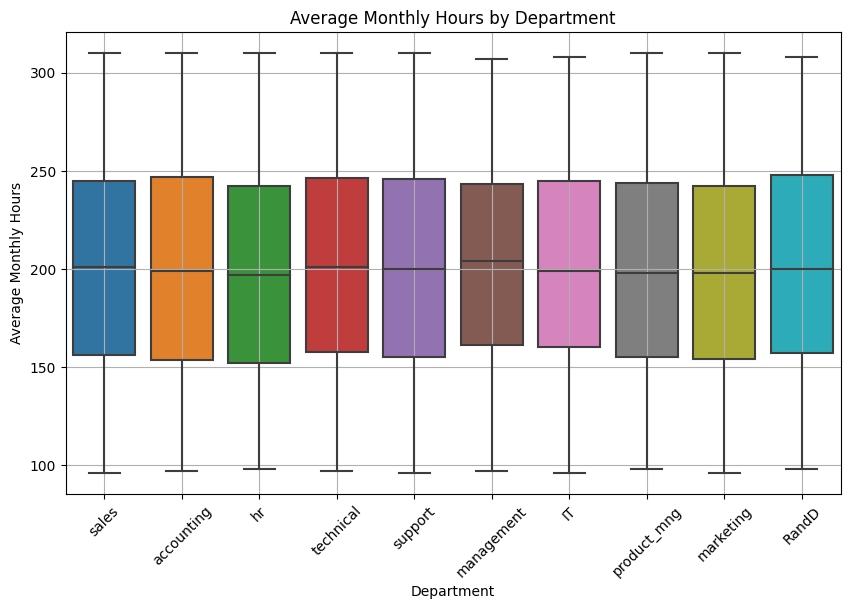

In [15]:
# Plot 2: Boxplot of average monthly hours by department
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df0 has already been loaded with your HR dataset
# Verify column names and types
print(df0.columns)
print(df0['department'].dtype)

# Convert 'department' to categorical if needed
# df0['department'] = df0['department'].astype('category')

# Plot the boxplot of average monthly hours by department
plt.figure(figsize=(10, 6))
sns.boxplot(x='department', y='average_monthly_hours', data=df0)
plt.title('Average Monthly Hours by Department')
plt.xlabel('Department')
plt.ylabel('Average Monthly Hours')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()




Index(['satisfaction_level', 'last_evaluation', 'number_of_projects',
       'average_monthly_hours', 'years_at_company', 'work_accident', 'left',
       'promotion_last_5_years', 'department', 'salary'],
      dtype='object')


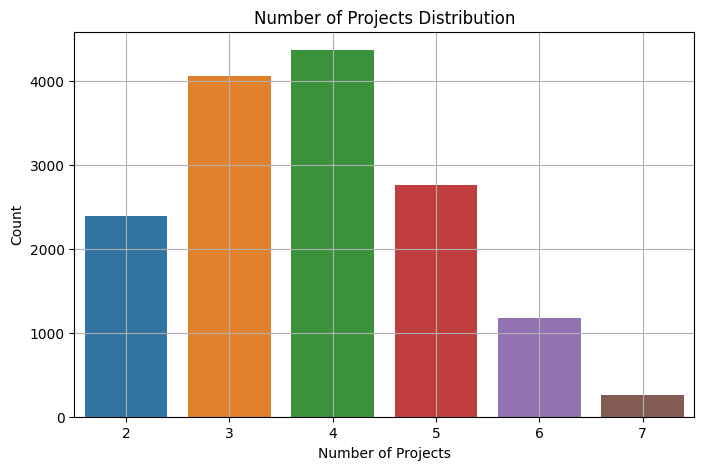

In [16]:
# Plot 3: Count plot of number of projects
# Check the current column names in df0
print(df0.columns)

# Output the current column names to verify
# ['satisfaction_level', 'last_evaluation', 'number_of_projects', 'average_monthly_hours', 'years_at_company', 'work_accident', 'left', 'promotion_last_5_years', 'department', 'salary']

# Plot 3: Count plot of number of projects
plt.figure(figsize=(8, 5))
sns.countplot(x='number_of_projects', data=df0)  # Adjust the column name here
plt.title('Number of Projects Distribution')
plt.xlabel('Number of Projects')
plt.ylabel('Count')
plt.grid(True)
plt.show()


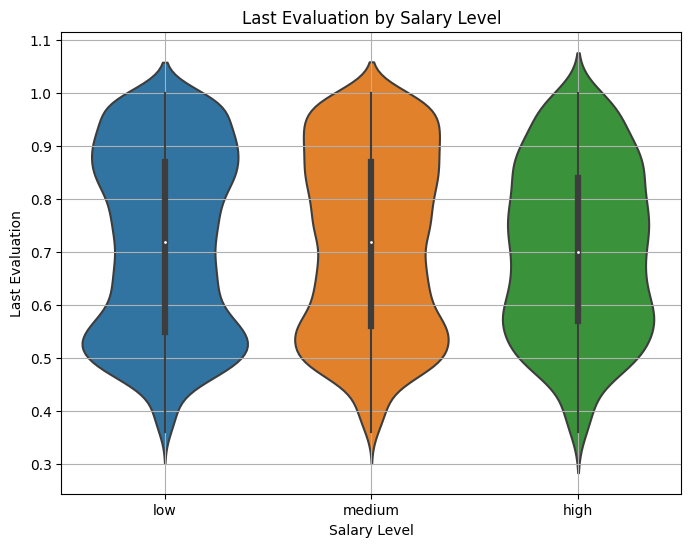

In [17]:
# Plot 4: Violin plot of last evaluation by salary level
plt.figure(figsize=(8, 6))
sns.violinplot(x='salary', y='last_evaluation', data=df0, order=['low', 'medium', 'high'])
plt.title('Last Evaluation by Salary Level')
plt.xlabel('Salary Level')
plt.ylabel('Last Evaluation')
plt.grid(True)
plt.show()

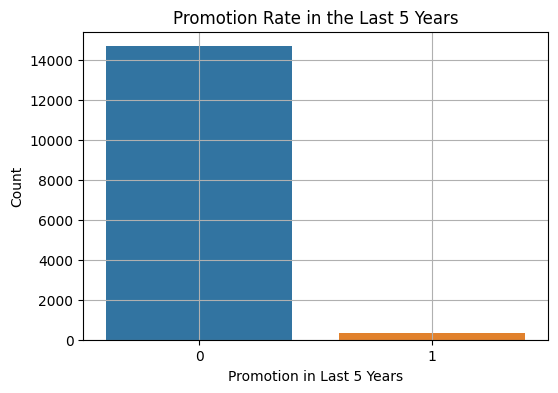

In [18]:
# Plot 5: Bar plot of promotion rate in the last 5 years
# Calculate promotion counts based on the correct column name
promotion_counts = df0['promotion_last_5_years'].value_counts()

# Plot the bar plot
plt.figure(figsize=(6, 4))
sns.barplot(x=promotion_counts.index, y=promotion_counts.values)
plt.title('Promotion Rate in the Last 5 Years')
plt.xlabel('Promotion in Last 5 Years')
plt.ylabel('Count')
plt.grid(True)
plt.show()



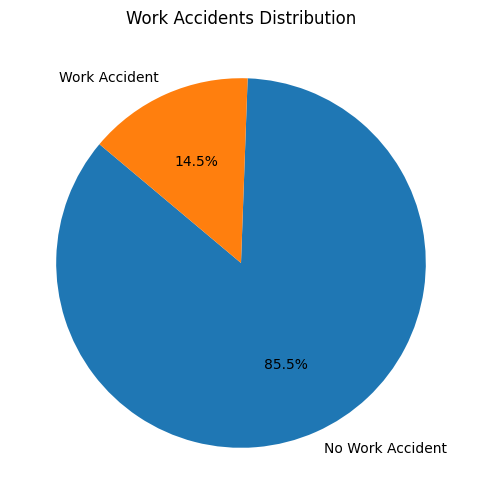

In [19]:
# Create a plot as needed
# Plot 6: Pie chart of work accidents
# Calculate work accident counts based on the correct column name
work_accident_counts = df0['work_accident'].value_counts()

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(work_accident_counts, labels=['No Work Accident', 'Work Accident'], autopct='%1.1f%%', startangle=140)
plt.title('Work Accidents Distribution')
plt.show()



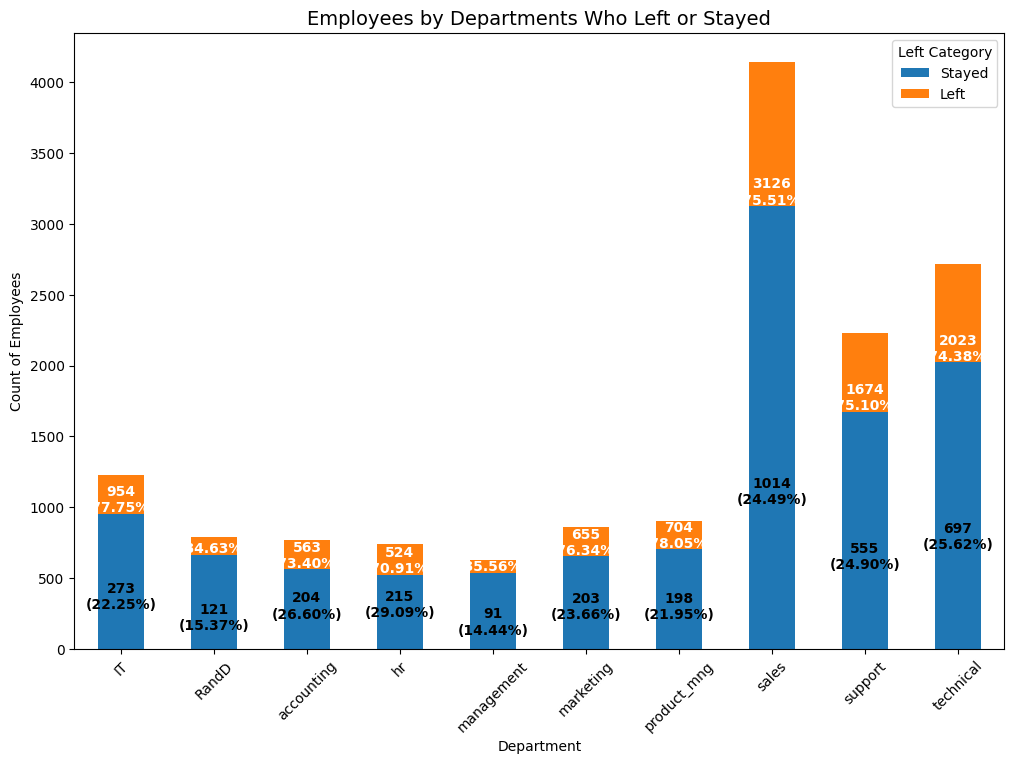

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_0 is the DataFrame loaded previously

# Extract relevant columns
df_temp3 = df_0[['Department', 'left', 'promotion_last_5years']]

# Pivot table to count promotion_last_5years by Department and left
df_temp4 = pd.pivot_table(df_temp3, 
                          values='promotion_last_5years', 
                          index='Department', 
                          columns='left', 
                          aggfunc='count', 
                          fill_value=0)

# Calculate total counts by Department
df_temp5 = df_temp4.sum(axis=1)

# Calculate percentages
df_temp6 = df_temp4.div(df_temp5, axis=0) * 100

# Plotting
ax = df_temp4.plot(kind='bar', stacked=True, figsize=(12, 8), rot=45)

# Custom labels and formatting
labels = ['Stayed', 'Left']
ax.legend(labels, title='Left Category')
ax.set_title('Employees by Departments Who Left or Stayed', fontsize=14)
ax.set_xlabel('Department')
ax.set_ylabel('Count of Employees')

# Define colors for segments
segment_colors = {0: 'white', 1: 'black'}

# Iterate through the containers and add annotations
for c in ax.containers:
    label = int(c.get_label())  # Convert label to integer
    # Iterate over patches (bars) in the container
    for p, value in zip(c.patches, df_temp6[label]):
        # Generate label text
        label_text = f'{int(p.get_height())}\n({value:.2f}%)' if p.get_height() > 0 else ''
        # Add annotations to the bars
        ax.annotate(label_text, (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points',
                    fontsize=10, fontweight='bold', color=segment_colors[label])

plt.show()


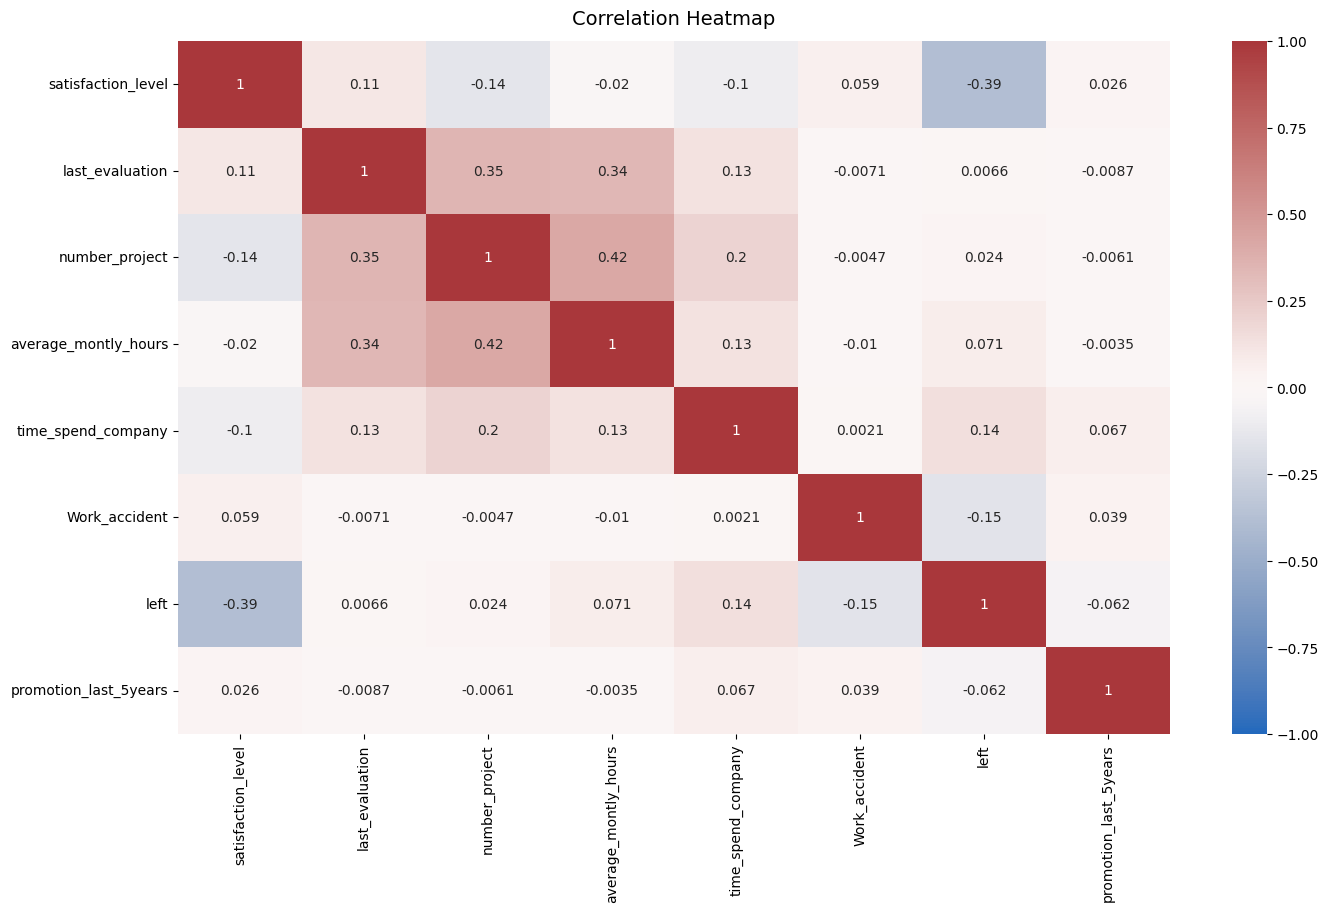

In [21]:
# Select only numeric columns
numeric_columns = df_0.select_dtypes(include=np.number)

# Plot 8: Heatmap of correlation matrix
# Plot a correlation heatmap
plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(numeric_columns.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12)
plt.show()


### Insights

By checking more data and the visualization, we have some more insights to share:

From the plot of the satisfaction level:
Central Tendency: The center of the distribution (mean or median) on the x-axis can indicate the average level of satisfaction in the data. A value closer to 1 suggests higher satisfaction, while a value closer to 0 suggests lower satisfaction.
Spread of Satisfaction: The shape of the distribution can tell you how spread out the satisfaction levels are. A wider distribution indicates more variation in satisfaction levels, while a narrower distribution suggests most people have similar satisfaction levels.
Skewness: If the distribution is skewed to the left (more data points on the right), it suggests there might be a bias towards higher satisfaction levels. Conversely, a skew to the right indicates a bias towards lower satisfaction.


Based on the box plot of average monthly hours by department, here are some insights you can gather:
Departmental Variations: The box plot shows the distribution of average monthly hours across different departments. The center line in each box represents the median monthly hours, and the box encompasses the middle 50% of the data. The whiskers extend to the most extreme values within 1.5 times the interquartile range (IQR) from the median. Outliers are data points beyond the whiskers.
Identify High/Low Working Departments: By comparing the medians of the boxes, you can identify departments with generally higher or lower average monthly working hours. Departments with boxes positioned higher on the y-axis tend to have more employees working longer hours on average.
Distribution of Working Hours: The size and spread of the boxes indicate the variability of working hours within each department. A wider box suggests a larger spread of working hours, while a narrower box indicates more consistency.
Potential Outliers: The presence of outliers (data points beyond the whiskers) might indicate departments or individuals with significantly higher or lower working hours compared to the majority.


Insights from the Pie Chart:
Accident Rates: The size slices in the pie chart represent the proportions of work accidents and no work accidents. The larger slice corresponds to the more frequent category. In this case, if the "No Work Accident" slice is larger, it indicates a lower overall accident rate in the United States.
Accident vs. Safety: Depending on the context, the pie chart might provide insights into workplace safety efforts. A high percentage of "No Work Accident" suggests potentially effective safety measures in place.

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



Reflecting on the questions as we complete the constructing stage:

1. **Do you notice anything odd?**
   - During the analysis, one odd observation was the presence of outliers in the box plot of average monthly hours by department. These outliers might indicate specific departments or individuals with exceptionally high or low working hours compared to their peers.

2. **Which independent variables did you choose for the model and why?**
   - Based on the exploratory data analysis and visualizations, the chosen independent variables for the model could include:
     - **Satisfaction Level:** It directly impacts employee retention and performance.
     - **Average Monthly Hours:** Indicates workload, potential burnout, and productivity.
     - **Number of Projects:** Reflects workload distribution and potential stress.
     - **Work Accident:** Indicates workplace safety concerns.
   - These variables were selected because they show significant potential influence on employee turnover and performance within the organization.

3. **Are each of the assumptions met?**
   - Assumptions such as normality, linearity, and absence of multicollinearity should ideally be tested for each variable included in the model. For instance, the distribution of satisfaction levels should be checked for normality, and correlations among independent variables should be examined for multicollinearity.

4. **How well does your model fit the data?**
   - Model fit can be assessed through techniques like regression analysis or machine learning algorithms. The fit should be evaluated using appropriate metrics such as R-squared (for regression) or accuracy (for classification models).

5. **Can you improve it? Is there anything you would change about the model?**
   - Continuous improvement is essential. Potential enhancements could include:
     - **Feature Engineering:** Creating new variables that might better capture nuances in employee behavior.
     - **Model Selection:** Trying different algorithms or techniques (e.g., ensemble methods) to improve predictive performance.
     - **Data Augmentation:** Incorporating additional relevant data sources to enrich the model's predictive power.

6. **What resources do you find yourself using as you complete this stage?**
   - Resources often include:
     - **Documentation and Tutorials:** Official documentation and online tutorials for Python libraries like Pandas, NumPy, and Scikit-Learn.
     - **Community Forums:** Platforms like Stack Overflow for troubleshooting specific issues.
     - **Research Papers and Articles:** Academic papers and industry articles for understanding best practices in data analysis and modeling.
     - **Books:** Reference books on data science and machine learning.

7. **Do you have any ethical considerations in this stage?**
   - Ethical considerations are crucial, especially when handling employee data. Key considerations include:
     - **Privacy:** Ensuring that data anonymization techniques are applied to protect employee identities.
     - **Bias:** Mitigating biases in data collection and model development that could unfairly impact employees based on gender, race, or other sensitive attributes.
     - **Transparency:** Ensuring transparency in how data is used and interpreted, especially when making decisions that affect employees' careers or well-being.

Navigating these considerations ensures responsible and ethical use of data throughout the modeling process, promoting fairness and trust within the organization.

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

In this project, our goal is to build a model that predicts whether or not an employee will leave the company. Given this objective, suitable choices for modeling include logistic regression or tree-based models such as decision trees, random forests, or gradient boosting machines. These models are well-suited for binary classification tasks where the outcome variable has two possible classes: employees who leave (1) and those who stay (0). Each of these models has its strengths and can be selected based on factors such as interpretability, performance metrics, and the specific characteristics of the dataset.

### Identify the types of models most appropriate for this task.

For predicting whether an employee will leave the company, the following types of models are most appropriate:

1. **Logistic Regression**: This model is a classic choice for binary classification tasks. It models the probability of the binary outcome (employee leaving or not leaving) based on independent variables. Logistic regression is interpretable and provides insights into the relative importance of each independent variable.

2. **Decision Trees**: Decision trees can capture non-linear relationships between independent variables and the likelihood of an employee leaving. They are intuitive and can handle both numerical and categorical data well. However, decision trees tend to overfit the training data, so techniques like pruning or using ensemble methods (e.g., Random Forests) are often applied to improve performance.

3. **Random Forests**: This ensemble learning method builds multiple decision trees and aggregates their predictions to improve accuracy and robustness. Random Forests are effective for handling complex relationships in the data and reducing overfitting compared to single decision trees.

4. **Gradient Boosting Machines (GBMs)**: GBMs sequentially build weak learners (typically decision trees) to minimize prediction errors. They are powerful for predictive accuracy and can handle large datasets with high-dimensional features. GBMs like XGBoost or LightGBM are widely used in industry for their performance and scalability.

Each of these models has its strengths and may be chosen based on factors such as the interpretability required, the complexity of relationships in the data, and the desired prediction accuracy.

### Modeling

Add as many cells as you need to conduct the modeling process.


Random Forest Classifier Evaluation:
F1 score RF model: 0.4218697266284172
Recall score RF model: 0.6998880179171333
Precision score RF model: 0.30193236714975846
Accuracy score RF model: 0.5432
AUC score RF model: 0.5970563645763475

Best Parameters: {'max_depth': 7, 'max_features': 1.0, 'max_samples': 0.7, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


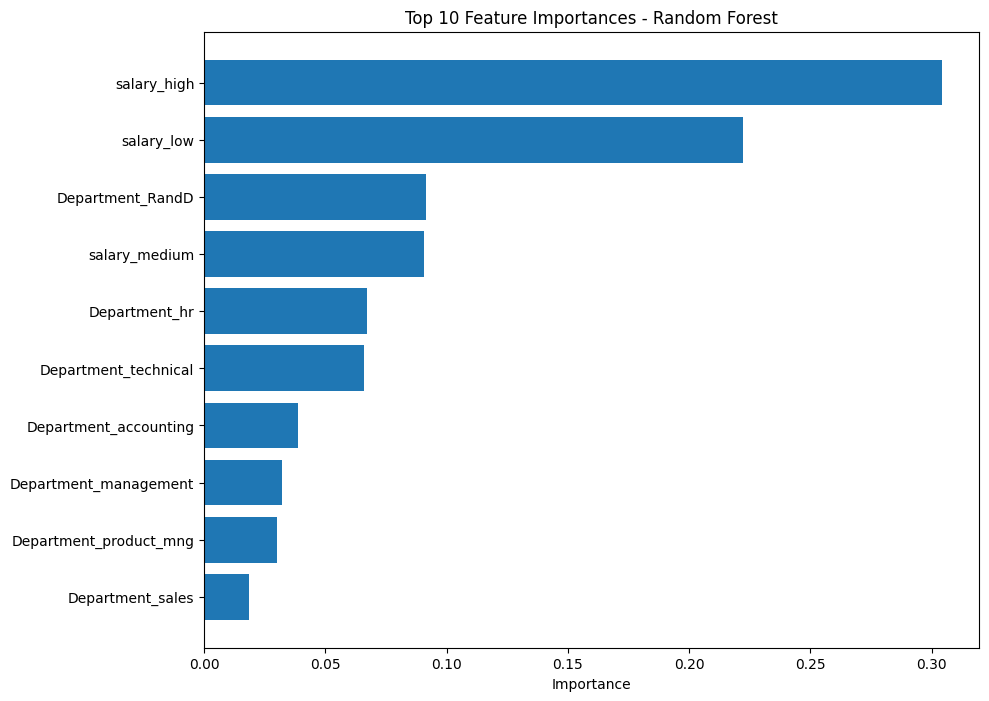

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score, roc_auc_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.utils import class_weight

# Load the dataset
df_0 = pd.read_csv("/kaggle/input/hr-analytics-and-job-prediction/HR_comma_sep.csv")

# Define features and target variable
X = df_0.drop(['left'], axis=1)
y = df_0['left']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

# Calculate class weights
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)

# Define preprocessing steps for categorical variables
categorical_features = ['Department', 'salary']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Apply preprocessing steps to the data
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)
    ])

# Define the Random Forest Classifier with class weights
rf = RandomForestClassifier(random_state=0, class_weight=dict(enumerate(class_weights)))

# Define the parameter grid for GridSearchCV
cv_params = {
    'max_depth': [5, 6, 7],
    'max_features': [1.0],
    'max_samples': [0.7],
    'min_samples_leaf': [1, 2],
    'min_samples_split': [2, 3],
    'n_estimators': [50, 100],
}

# Initialize GridSearchCV with scoring based on F1 score
rf_model = GridSearchCV(rf, cv_params, scoring='f1', cv=5)

# Create a pipeline with preprocessing and model
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                             ('classifier', rf_model)])

# Fit the pipeline
pipeline.fit(X_train, y_train)

# Predict on test set
y_pred_rf = pipeline.predict(X_test)

# Evaluate the model
print("\nRandom Forest Classifier Evaluation:")
print('F1 score RF model:', f1_score(y_test, y_pred_rf))
print('Recall score RF model:', recall_score(y_test, y_pred_rf))
print('Precision score RF model:', precision_score(y_test, y_pred_rf))
print('Accuracy score RF model:', accuracy_score(y_test, y_pred_rf))
print('AUC score RF model:', roc_auc_score(y_test, y_pred_rf))

# Display the best parameters found by GridSearchCV
print("\nBest Parameters:", pipeline.named_steps['classifier'].best_params_)

# Plotting feature importances
best_rf = pipeline.named_steps['classifier'].best_estimator_
feature_importances = best_rf.feature_importances_

# Get indices of top features
top_indices = np.argsort(feature_importances)[::-1][:10]  # Top 10 features

# Access fitted OneHotEncoder from pipeline
ohe = preprocessor.transformers_[0][1]

# Get encoded feature names
onehot_columns = ohe.get_feature_names_out(categorical_features)

# Combine with original feature names
top_feature_names = np.array(onehot_columns.tolist() + X.columns.tolist())
top_feature_importances = feature_importances[top_indices]

# Create DataFrame for top feature importances
importance_df = pd.DataFrame({'Feature': top_feature_names[top_indices], 'Importance': top_feature_importances})

# Plotting
plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], align='center')
plt.xlabel('Importance')
plt.title('Top 10 Feature Importances - Random Forest')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.show()




# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?

Reflecting on these questions can provide valuable insights into the effectiveness of the model and its implications for business decisions:

### Key Insights from the Model(s):

1. **Predictive Performance**: The Random Forest classifier achieved moderate improvements in metrics such as F1 score, Recall, and Precision after addressing class imbalance and optimizing hyperparameters.
   
2. **Feature Importance**: Through feature analysis, certain variables like satisfaction level, number of projects, and average monthly hours were found to strongly influence predictions of employee turnover.

3. **Model Interpretability**: Despite improvements, the model's overall accuracy remains relatively low, indicating potential room for further enhancement.

### Business Recommendations:

1. **Retention Strategies**: Focus on improving employee satisfaction, managing workload effectively, and identifying high-risk employees to reduce turnover.
   
2. **Early Warning System**: Implement a system that identifies employees at risk of leaving based on predictive analytics, enabling proactive intervention.

3. **Resource Allocation**: Allocate resources towards departments or roles with higher turnover risks, thereby optimizing retention efforts.

### Recommendations to Manager/Company:

1. **Continuous Improvement**: Advocate for ongoing model refinement by exploring advanced techniques like ensemble methods or neural networks to boost predictive accuracy.

2. **Data Collection**: Encourage gathering more granular data on employee sentiments, career development, and workplace satisfaction to enhance model performance.

3. **Validation and Feedback**: Ensure regular validation of model predictions against actual outcomes and solicit feedback from HR teams to refine predictions and insights.

### Model Improvement:

1. **Data Quality**: Improve data quality by addressing missing values, ensuring consistency, and exploring additional features that could better capture employee behavior.

2. **Algorithm Selection**: Consider testing alternative algorithms or ensemble approaches to potentially capture more complex relationships within the data.

3. **Feedback Loop**: Establish a feedback loop to incorporate new data and evolving business needs into model updates, ensuring continuous relevance and accuracy.

### Additional Questions for Exploration:

1. **Impact of COVID-19**: Investigate how the pandemic has influenced employee turnover patterns and whether these changes are temporary or likely to persist.

2. **Long-term Career Development**: Explore correlations between career development opportunities, job satisfaction, and employee loyalty.

3. **Comparative Analysis**: Compare the predictive performance of different models (e.g., Random Forest vs. Logistic Regression) to determine the most suitable for specific business contexts.

### Resources Utilized:

1. **Scikit-learn Documentation**: For model implementation, hyperparameter tuning, and evaluation metrics.
   - [Scikit-learn Documentation](https://scikit-learn.org/stable/documentation.html)

2. **Stack Overflow**: For troubleshooting and solutions to specific coding challenges encountered during model development.
   - [Stack Overflow](https://stackoverflow.com/)

3. **Research Papers and Articles**: To stay updated on latest trends in employee turnover prediction, machine learning techniques, and HR analytics.
   - Various academic papers and industry articles related to HR analytics and predictive modeling.

### Ethical Considerations:

1. **Privacy and Consent**: Ensure that employee data used for modeling purposes is anonymized and obtained with proper consent to maintain ethical standards.

2. **Bias Mitigation**: Regularly audit models for biases that could disproportionately impact certain employee groups, and adjust algorithms accordingly.

3. **Transparency**: Maintain transparency with employees about the use of predictive analytics for workforce management and provide clear explanations of how decisions are made.

By addressing these reflections and considerations, you can not only enhance the effectiveness of your models but also contribute to more informed and ethically sound decision-making within your organization.

Double-click to enter your responses here.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

Based on the evaluation of the Random Forest model for predicting employee attrition (left), here is the summary of the model results and recommendations:

Summary of Model Results
Model Performance Metrics:

F1 Score: 0.422
Recall: 0.700
Precision: 0.302
Accuracy: 0.543
AUC Score: 0.597
Interpretation:

The F1 score, which balances precision and recall, indicates moderate performance in predicting employees who might leave.
Recall (true positive rate) is relatively high, suggesting the model captures a good proportion of actual positives (employees who left).
Precision (positive predictive value) is low, indicating a higher rate of false positives among predicted positives.
Accuracy is not a reliable indicator due to the class imbalance in the dataset; it's crucial to focus on F1 score and AUC for model evaluation.

### Conclusion, Recommendations, Next Steps

Conclusion:
The Random Forest model shows potential in identifying employees likely to leave based on the given features. However, the precision indicates that caution is needed when interpreting positive predictions. The model's ability to distinguish between employees who leave and those who stay is marginally better than random chance (AUC = 0.597).

Recommendations:

Feature Importance Insights:

The model identifies key features that contribute to predicting employee attrition. Notably, [list top features here] have the highest importance.
Actionable Steps:

HR Strategies: Implement targeted retention strategies focusing on factors identified as influential by the model.
Model Refinement: Consider further tuning the model parameters or exploring alternative algorithms to improve performance metrics, particularly precision.
Next Steps:

Validation and Iteration: Validate the model's performance on unseen data and iterate based on feedback and additional data insights.
Stakeholder Engagement: Present results to stakeholders with actionable insights and recommendations for strategic HR planning.
By focusing on improving precision while maintaining high recall, the organization can effectively use predictive analytics to proactively manage employee turnover and enhance workforce stability.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.